In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
from matplotlib.pyplot import MultipleLocator
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import expm
from numba import jit,njit
from numpy.linalg import eig

N = 30
kappa = 0
k_list = np.arange(2 * np.pi / N, 2*np.pi, 2*np.pi/N)
distance = 20
C_distance_1 = 0
C_distance_2 = 0 
distance_list = range(20)
C_distance_1 = np.zeros(len(distance_list),)
C_distance_2 = np.zeros(len(distance_list),) 
for i, distance in enumerate(distance_list):
    for xx,k1 in enumerate(k_list):
        for yy,k2 in enumerate(k_list):
            if xx + yy != N-2:
                C_distance_1[i] += np.exp(1j*(k1+k2)*distance)

                C_distance_2[i] += np.exp(1j*(k1+k2)*distance-1j *k1   )

            C_distance_1[i] += np.exp(1j*(k1-k2)/2)
            C_distance_2[i] += np.exp(-1j*(k1+k2)/2)

C_distance_1 /= 4*N**2
C_distance_2 /= -4*N**2

/var/folders/_6/0kk73yx927x6htqwlt_crj_w0000gn/T/ipykernel_10797/217819099.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  C_distance_1[i] += np.exp(1j*(k1+k2)*distance)
/var/folders/_6/0kk73yx927x6htqwlt_crj_w0000gn/T/ipykernel_10797/217819099.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  C_distance_2[i] += np.exp(1j*(k1+k2)*distance-1j *k1   )
/var/folders/_6/0kk73yx927x6htqwlt_crj_w0000gn/T/ipykernel_10797/217819099.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  C_distance_1[i] += np.exp(1j*(k1-k2)/2)
/var/folders/_6/0kk73yx927x6htqwlt_crj_w0000gn/T/ipykernel_10797/217819099.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  C_distance_2[i] += np.exp(-1j*(k1+k2)/2)


In [ ]:

kappa = 0
k_list = np.arange(2 * np.pi / N, 2*np.pi, 2*np.pi/N)
distance = 20
C_distance_1 = 0
C_distance_2 = 0 
N_list = np.arange(10, 150, 10)
C_distance_1 = np.zeros((len(N_list),),dtype=np.complex128)
C_distance_2 = np.zeros((len(N_list),),dtype=np.complex128) 
for i, N in enumerate(N_list):
    k_list = np.arange(2 * np.pi / N, 2*np.pi, 2*np.pi/N)
    distance = N//10
    for xx,k1 in enumerate(k_list):
        for yy,k2 in enumerate(k_list):
            if xx + yy != N-2:
                C_distance_1[i] += np.exp(1j*(k1+k2)*distance)

                C_distance_2[i] += np.exp(1j*(k1+k2)*distance-1j *k1   )

            C_distance_1[i] += np.exp(1j*(k1-k2)/2)
            C_distance_2[i] += np.exp(-1j*(k1+k2)/2)
    C_distance_1[i] /= 4*N**2
    C_distance_2[i] /= 4*N**2



In [64]:
np.savez('fig5.npz', N_list = N_list, C_distance_1=C_distance_1, C_distance_2=C_distance_2,Correlation_r =Correlation_r)

In [128]:
C_distance_2, C_distance_1,1/np.pi**2

(array([-0.10132117-7.0836161e-17j]),
 array([0.10128994+3.7130546e-18j]),
 0.10132118364233778)

/opt/anaconda3/envs/python39/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/python39/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.1, 0.102)

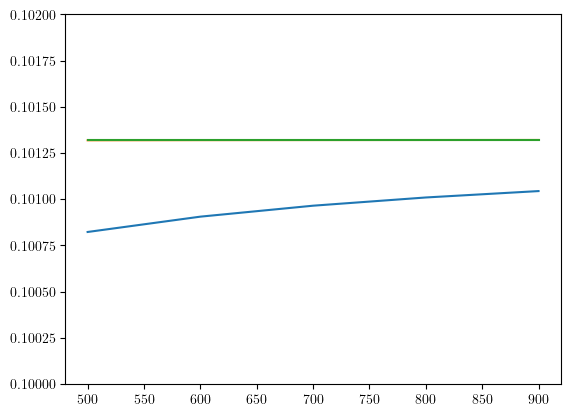

In [115]:
plt.plot((N_list),np.abs((C_distance_1)))
plt.plot((N_list),-(C_distance_2))
plt.plot((N_list),np.ones(len(N_list),)*1/np.pi**2)
plt.ylim((0.1,0.102))

In [43]:
#####################################################################
#                   example 5 (DEPRECATED)                          #
#    In this script we demonstrate how to use QuSpin's to build     #
#    the Hamiltonian of the SSH model in real and momentum space.   #
#    Along the way, we showcase the block tools which allow the     #
#    user to create block-diagonal Hamiltonians. Last, we show      #
#    how to time-evolve free fermion states like the Fermi sea      #
#    and measure correlators.                                       #
#####################################################################
from quspin.operators import hamiltonian, exp_op  # Hamiltonians and operators
from quspin.basis import spinless_fermion_basis_1d  # Hilbert space fermion basis
from quspin.tools.block_tools import block_diag_hamiltonian  # block diagonalisation

from quspin.tools.evolution import expm_multiply_parallel
import numpy as np  # generic math functions
import matplotlib.pyplot as plt  # plotting library
from quspin.operators import commutator

##### define model parameters #####
L = 20  # system size
J = 1.0  # uniform hopping
mu = 0.0 # bond dimerisation
Delta = 1.0  # staggered potential
delta = 0.4
##### construct single-particle Hamiltonian #####
# define site-coupling lists
hop_pm = [[-J , i, (i + 1) % L] for i in range(L)]  
hop_mp = [[+J , i, (i + 1) % L] for i in range(L)]  
hop_mm = [[Delta + (-1)**i*delta , i, (i + 1) % L] for i in range(L)]  
hop_pp = [[-Delta + (-1)**i*delta , i, (i + 1) % L] for i in range(L)]  
stagg_pot = [[2*mu , i] for i in range(L)]
# define static and dynamic lists
static = [["+-", hop_pm], ["-+", hop_mp],["++", hop_pp],["--", hop_mm], ["z", stagg_pot]]
dynamic = []
# define basis


basis = spinless_fermion_basis_1d(L, Nf=range(1, L+1, 2)) 
# build real-space Hamiltonian
H = hamiltonian(static, dynamic, basis=basis, dtype=np.complex128,check_pcon=False,check_symm=False,check_herm=False)

static = [["I", [[1. , i] for i in [1]]]]  # 恒等算符
Identity = hamiltonian(static, [], basis=basis, dtype=np.float64,check_symm=False,check_herm=False)


Operator_p = [[1/2 * np.sqrt(1-mu**2 ) * (mu**(i)+ mu**(L-i-1)), i] for i in range(L)]
Operator_m = [[1/2 * np.sqrt(1-mu**2) * (mu**(i)- mu**(L-i-1)), i] for i in range(L)]
static = [["+", Operator_p], ["-", Operator_m]]
D = hamiltonian(static, dynamic, basis=basis, dtype=np.complex128,check_pcon=False,check_herm=False,check_symm=False)
D_dagger = D.conj().T

Operator_p = [[1/(np.sqrt(2 * (mu**(2*(L-1))+1 ))) * (mu**(i)+ mu**(L-i-1)), i] for i in range(1)]
Operator_m = [[1/(np.sqrt(2 * (mu**(2*(L-1))+1 ))) * (mu**(i)- mu**(L-i-1)), i] for i in range(1)]
static = [["+", Operator_p], ["-", Operator_m]]
D_1 = hamiltonian(static, dynamic, basis=basis, dtype=np.complex128,check_pcon=False,check_herm=False,check_symm=False)
D1_dagger = D_1.conj().T




In [4]:
print(basis)

reference states: 
array index   /   Fock state   /   integer repr. 
      0.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1>  1048575 
      1.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0>  1048572 
      2.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0>  1048570 
      3.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1>  1048569 
      4.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0>  1048566 
      5.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1>  1048565 
      6.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1>  1048563 
      7.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0>  1048560 
      8.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0>  1048558 
      9.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1>  1048557 
     10.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1>  1048555 
     11.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0>  1048552 
     12.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1>  1048551 
     13.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0>  1048548 
     14.  |1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0>  1048546 
 

In [ ]:
hop_mm1 = [[1, 1,2] ]
hop_mm2 = [[1, 9,10] ]
static1 = [["--", hop_mm1]]
static2 = [["--", hop_mm2]]
Operator1 = hamiltonian(static1, dynamic, basis=basis, dtype=np.complex128,check_pcon=False,check_herm=False,check_symm=False)
Operator2 = hamiltonian(static2, dynamic, basis=basis, dtype=np.complex128,check_pcon=False,check_herm=False,check_symm=False)
# define basis

In [44]:
from scipy.sparse.linalg import eigs

# 假设 H 是 QuSpin 的 Hamiltonian 对象
H_mat = H.tocsc()  # 转换为稀疏矩阵（CSC 格式）

# 计算前 6 个本征值和本征态（k=6）
eigenvalues, eigenvectors = eigs(H_mat, k=1,  which='LI')  # 'LR' 表示最大实部
print(eigenvalues,eigenvectors)


[1.85962357e-14+5.05100121j] [[ 0.01308336-0.00403436j]
 [-0.00269625+0.00076972j]
 [-0.01308336+0.00403436j]
 ...
 [-0.00076972-0.00269625j]
 [-0.00403436-0.01308336j]
 [ 0.00076972+0.00269625j]]


reference states: 
array index   /   Fock state   /   integer repr. 
 0.  |1 0 0 0>  8 
The states printed do NOT correspond to the physical states: see review arXiv:1101.3281 for more details about reference states for symmetry-reduced blocks.



/opt/anaconda3/envs/python39/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/python39/lib/python3.9/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


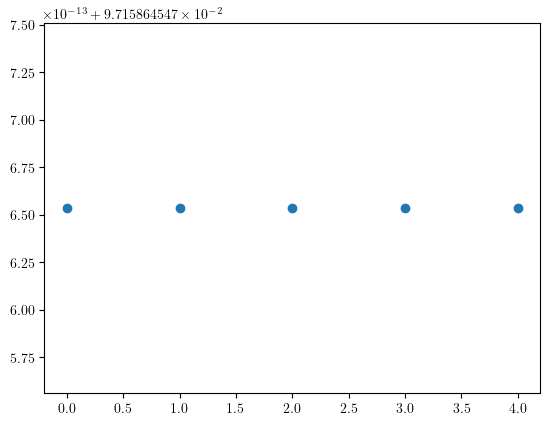

In [110]:
eigenvectors = eigenvectors/np.sqrt(np.vdot(eigenvectors,eigenvectors))
C = np.zeros((int(L/2),),dtype=np.complex128)
for i in range(L//2):
    hop_mm1 = [[1, 1,2] ]
    hop_mm2 = [[1, 2+i,3+i] ]
    static1 = [["--", hop_mm1]]
    static2 = [["--", hop_mm2]]
    Operator1 = hamiltonian(static1, dynamic, basis=basis, dtype=np.complex128,check_pcon=False,check_herm=False,check_symm=False)
    Operator2 = hamiltonian(static2, dynamic, basis=basis, dtype=np.complex128,check_pcon=False,check_herm=False,check_symm=False)
    psi_1 = Operator1.dot(eigenvectors)
    psi_2 = Operator2.dot(eigenvectors)
    C[i] = np.vdot(psi_2,psi_1)

plt.scatter(range(L//4),C[1::2])
Correlation_r = C

In [111]:
C

array([-0.12514591+2.63771964e-17j,  0.09715865+1.66179344e-17j,
       -0.10215865+1.82093242e-18j,  0.09715865+2.50774111e-17j,
       -0.10215865+3.69319293e-17j,  0.09715865+2.01590016e-17j,
       -0.10215865+1.35718494e-17j,  0.09715865+1.89791492e-17j,
       -0.10215865+6.58565393e-18j,  0.09715865+3.10856983e-18j])

In [4]:
XX  = np.load('fig6.npz')

# np.savez('fig5.npz', N_list = N_list, C_distance_1=C_distance_1, C_distance_2=C_distance_2,Correlation_r =Correlation_r)

N_list = XX['N_list']
C_distance_1 = XX['C_distance_1']
C_distance_2 = XX['C_distance_2']
Correlation_r = XX['Correlation_r']

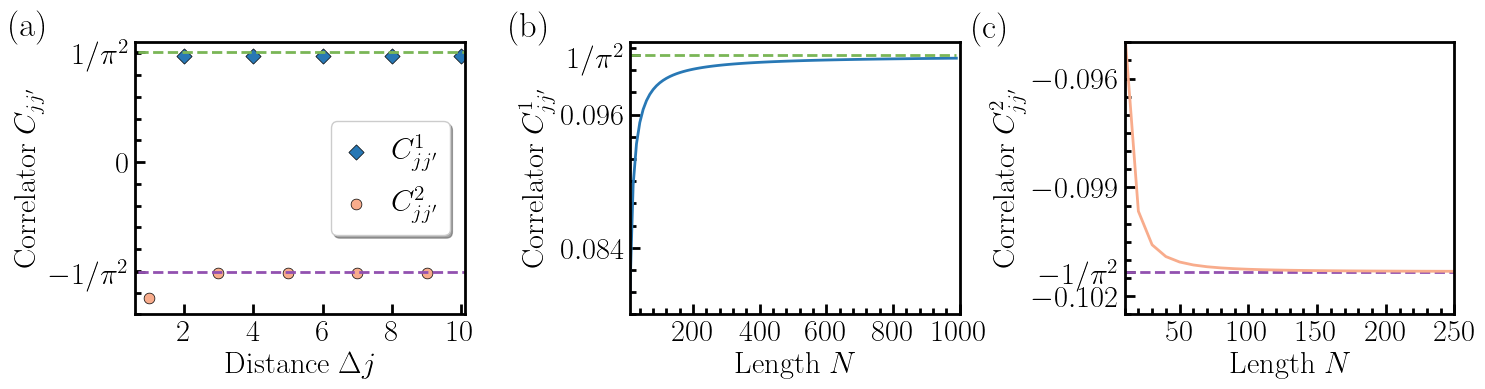

In [6]:
import matplotlib.ticker as ticker

plt.rcParams.update({
    "text.usetex": True,             # 启用 LaTeX 渲染
    "font.family": "serif",          # sans-serif:标题不会改成latex字体serif:标题会变成latex
    "font.serif": ["Computer Modern"],  # 使用 Computer Modern 字体
    "text.latex.preamble": r"\usepackage{amsmath}"  # 如果需要数学包
})
font_size = 22
C1 = ['#2878B5','#9AC9DB','#F8AC8C', '#C82423']
C2 = ['#7AB656','#9251B0','#A5AEB7', '#CC7C71']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
C = ['#0079fa','#1c88fb','#3997fb','#55a6fc','#8ec3fd','#aad2fd']

L = 20
axs[0].plot(np.linspace(-1,L//2+1,10),np.ones(10,)/np.pi**2,c = C2[0],ls = "--" , lw = 2)
axs[0].plot(np.linspace(-1,L//2+1,10),-np.ones(10,)/np.pi**2,c = C2[1],ls = "--",lw = 2)
axs[0].scatter(range(2,L//2+1,2),Correlation_r[1::2],
    marker="D",        # 实心方形
    s=60,
    color="#2878B5",   # 橙色（默认Matplotlib第二颜色）
    edgecolor="black",
    linewidth=0.5,
    label=r"$C_{jj'}^1$")

axs[0].scatter(range(1,L//2+1,2),Correlation_r[::2],
    marker="o",        # 实心圆
    s=60,             # 点大小
    color="#F8AC8C",  # 蓝色（默认Matplotlib第一颜色）
    edgecolor="black",
    linewidth=0.5,
    label=r"$C_{jj'}^2$"
               )

label = axs[0].legend( loc='right', prop={'size': font_size },ncol=1,   shadow=True, handleheight=0.5, handlelength=0.8)

axs[0].xaxis.set_major_locator(MultipleLocator(2))
# axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.02))
axs[0].yaxis.set_major_locator(MultipleLocator(0.5))
axs[0].set_xlabel(r'Distance $\Delta j $', size=font_size)
axs[0].set_ylabel(r'Correlator $C_{jj^{\prime}}$', size=font_size)
axs[0].tick_params(labelsize=font_size)
axs[0].set_xlim((0.6,10.1))
axs[0].set_ylim((-0.14,0.11))


# 1. 获取当前y轴刻度位置并添加新刻度
current_ticks = list(axs[0].get_yticks())
new_tick1 = 1/np.pi**2  # 你想要添加的刻度值
current_ticks.append(new_tick1)
new_tick2 = -1/np.pi**2  # 你想要添加的刻度值
current_ticks.append(new_tick2)
current_ticks.sort()  # 保持刻度有序

# 2. 设置刻度位置和格式
axs[0].yaxis.set_major_locator(ticker.FixedLocator(current_ticks))

# 3. 单独设置新刻度的显示样式（红色加粗）
axs[0].yaxis.set_major_formatter(ticker.FixedFormatter(
    [fr"${x:.0f}$" if not (np.isclose(x, new_tick1) or np.isclose(x, new_tick2)) 
     else r"${1}/{\pi^2}$" if np.isclose(x, new_tick1) 
     else r"$-{1}/{\pi^2}$" for x in current_ticks]
))

axs[1].plot(N_list,C_distance_1,c = C1[0],lw = 2)
axs[1].plot(N_list,np.ones(len(N_list),)/np.pi**2,c = C2[0],ls = "--",lw = 2)
axs[1].set_xlim((10,1000))
axs[1].set_ylim((0.078,0.1025))
axs[1].xaxis.set_major_locator(MultipleLocator(200))
axs[1].xaxis.set_minor_locator(MultipleLocator(40))
axs[1].yaxis.set_major_locator(MultipleLocator(0.012))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.002))
axs[1].set_xlabel(r'Length $N $', size=font_size)
axs[1].set_ylabel(r'Correlator $C_{jj^{\prime}}^1$', size=font_size)

# 1. 获取当前y轴刻度位置并添加新刻度
current_ticks = list(axs[1].get_yticks())
new_tick = 1/np.pi**2  # 你想要添加的刻度值
current_ticks.append(new_tick)
current_ticks.sort()  # 保持刻度有序

# 2. 设置刻度位置和格式
axs[1].yaxis.set_major_locator(ticker.FixedLocator(current_ticks))

# 3. 单独设置新刻度的显示样式（红色加粗）
axs[1].yaxis.set_major_formatter(ticker.FixedFormatter(
    [fr"${x:.3f}$" if x != new_tick else r"${1}/{\pi ^2 }$" for x in current_ticks]
))

axs[2].plot(N_list,- np.ones(len(N_list),)/np.pi**2,c = C2[1],ls = "--",lw = 2)
axs[2].plot(N_list,-C_distance_2,c = C1[2],lw = 2)
axs[2].set_xlabel(r'Length $N $', size=font_size)
axs[2].set_ylabel(r'Correlator $C_{jj^{\prime}}^2$', size=font_size)
axs[2].set_xlim((10,250))
axs[2].set_ylim((-0.1025,-0.095))
axs[2].xaxis.set_major_locator(MultipleLocator(50))
axs[2].xaxis.set_minor_locator(MultipleLocator(10))
axs[2].yaxis.set_major_locator(MultipleLocator(0.003))
axs[2].yaxis.set_minor_locator(MultipleLocator(0.0005))

# 在原有代码基础上添加以下内容：

# 1. 获取当前y轴刻度位置并添加新刻度
current_ticks = list(axs[2].get_yticks())
new_tick = -1/np.pi**2  # 你想要添加的刻度值
current_ticks.append(new_tick)
current_ticks.sort()  # 保持刻度有序

# 2. 设置刻度位置和格式
axs[2].yaxis.set_major_locator(ticker.FixedLocator(current_ticks))

# 3. 单独设置新刻度的显示样式（红色加粗）
axs[2].yaxis.set_major_formatter(ticker.FixedFormatter(
    [fr"${x:.3f}$" if x != new_tick else r"$-{1}/{\pi ^2 }$" for x in current_ticks]
))

# 4. 刷新刻度显示
# axs[2].tick_params(axis='y', which='major', labelsize=font_size)

for i in range(3):
    axs[i].tick_params(which='minor',direction='in', length=4,width=2,axis = "both")
    axs[i].tick_params(which='major',direction='in', length=7,width=2,labelsize=font_size,axis = "both")
    axs[i].spines['bottom'].set_linewidth(2)
    axs[i].spines['top'].set_linewidth(2)
    axs[i].spines['right'].set_linewidth(2)
    axs[i].spines['left'].set_linewidth(2)
    axs[i].tick_params(labelsize=font_size)
axs[0].text(-3, 0.116, '(a)', fontsize=font_size + 3)
axs[1].text(-350, 0.103, '(b)', fontsize=font_size + 3)
axs[2].text(-100, -0.0949, '(c)', fontsize=font_size + 3)
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.savefig('fig6.pdf',transparent = True,bbox_inches = 'tight')

In [202]:
current_ticks

[np.float64(-0.10400000000000001),
 np.float64(-0.10200000000000001),
 np.float64(-0.1),
 np.float64(-0.098),
 np.float64(-0.096),
 np.float64(-0.09400000000000001),
 0.10132118364233778]